## Data Preparation

In [1]:
# downloading toronto geojson file,for this we need wget and json libraries
import wget
wget.download('https://raw.githubusercontent.com/adamw523/toronto-geojson/master/simple.geojson', 'toronto.json')
#!wget --quiet https://raw.githubusercontent.com/adamw523/toronto-geojson/master/simple.geojson
print('Data downloaded!')

Data downloaded!


In [2]:
import json
with open('toronto.json') as json_data:
    toronto_data = json.load(json_data)

In [3]:
toronto_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'DAUID': '35200879',
    'PRUID': '35',
    'CSDUID': '3520005',
    'HOODNUM': 81,
    'HOOD': 'Trinity-Bellwoods',
    'FULLHOOD': 'Trinity-Bellwoods (81)'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-79.40428280044927, 43.64797961606815],
      [-79.403956753622, 43.64718271074494],
      [-79.42236786578222, 43.643467621011894],
      [-79.42640543946513, 43.65360764326518],
      [-79.41868792113178, 43.65521730993704],
      [-79.41769878521191, 43.65524323486715],
      [-79.41514736685951, 43.65496322517198],
      [-79.40767889826175, 43.65646442447146],
      [-79.40428280044927, 43.64797961606815]]]}},
  {'type': 'Feature',
   'properties': {'DAUID': '35201763',
    'PRUID': '35',
    'CSDUID': '3520005',
    'HOODNUM': 1,
    'HOOD': 'West Humber-Clairville',
    'FULLHOOD': 'West Humber-Clairville (1)'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-79.5666757498039

In [4]:
# selecting features in order to get neighborhoods' coordinates
neighborhoods_data = toronto_data['features']

In [5]:
# we can see here one neighborhood profile, we need name ('HOOD') and 'coordinates'
neighborhoods_data[0]

{'type': 'Feature',
 'properties': {'DAUID': '35200879',
  'PRUID': '35',
  'CSDUID': '3520005',
  'HOODNUM': 81,
  'HOOD': 'Trinity-Bellwoods',
  'FULLHOOD': 'Trinity-Bellwoods (81)'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-79.40428280044927, 43.64797961606815],
    [-79.403956753622, 43.64718271074494],
    [-79.42236786578222, 43.643467621011894],
    [-79.42640543946513, 43.65360764326518],
    [-79.41868792113178, 43.65521730993704],
    [-79.41769878521191, 43.65524323486715],
    [-79.41514736685951, 43.65496322517198],
    [-79.40767889826175, 43.65646442447146],
    [-79.40428280044927, 43.64797961606815]]]}}

In [6]:
import pandas as pd
# define the dataframe columns
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [7]:
neighborhoods

,Neighborhood,Latitude,Longitude


In [8]:
#looping through json file to fill dataframe

for data in neighborhoods_data:
    neighborhood_name = data['properties']['HOOD'] 
     
    neighborhood_latlon = data['geometry']['coordinates'][0][0]
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [9]:
neighborhoods.head()

,Neighborhood,Latitude,Longitude
0,Trinity-Bellwoods,43.648,-79.4043
1,West Humber-Clairville,43.7118,-79.5667
2,Mount Olive-Silverstone-Jamestown,43.7355,-79.5783
3,Humber Summit,43.7488,-79.5576
4,Thistletown-Beaumond Heights,43.7296,-79.5539


In [10]:
neighborhoods.shape[0]

140

In [11]:
# to solve our problem we also need statistics about number of russian speaking people in Toronto neighbourhoods

neigh_data = pd.read_csv('https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/ef0239b1-832b-4d0b-a1f3-4153e53b189e?format=csv', decimal=',')
neigh_data.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%


In [12]:
# getting rid of unnecessary columns
neigh_data.drop(['Data Source', 'City of Toronto'], axis=1, inplace=True)
neigh_data.head()

,_id,Category,Topic,Characteristic,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,Neighbourhood Number,129,128,20,95,42,34,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,TSNS2020 Designation,No Designation,No Designation,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,"Population, 2016","29,113","23,757","12,054","30,526","27,695","15,873",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,"Population, 2011","30,279","21,988","11,904","29,177","26,918","15,434",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Population Change 2011-2016,-3.90%,8.00%,1.30%,4.60%,2.90%,2.80%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%


In [13]:
# to find required data (in this case how many people consider russian as a mother tongue language in Toronto) I need to strip string  

word = '              Russian'
word.strip()
russian_df =neigh_data[(neigh_data['Category']=='Language') & (neigh_data['Characteristic']== word)]
russian_df.head()

,_id,Category,Topic,Characteristic,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
279,280,Language,Mother tongue,Russian,15,20,170,330,330,"1,545",...,845,110,80,40,40,105,145,200,470,95
550,551,Language,Language spoken most often at home,Russian,0,20,110,125,195,"1,185",...,600,65,40,15,20,50,65,95,340,60


In [14]:
# for futher analysis I need only information in the first row, so I delete the second one

russian_df=russian_df.iloc[:-1]
russian_df.head()

,_id,Category,Topic,Characteristic,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
279,280,Language,Mother tongue,Russian,15,20,170,330,330,"1,545",...,845,110,80,40,40,105,145,200,470,95


In [15]:
# dropping columns and transposing table, then resetting index
russian_new=russian_df.drop(['_id','Category', 'Topic', 'Characteristic'], axis=1, inplace=True)
russian_new=russian_df.T
print(russian_df.head())
russian_new.reset_index()

    Agincourt North Agincourt South-Malvern West Alderwood Annex  \
279              15                           20       170   330   

    Banbury-Don Mills Bathurst Manor Bay Street Corridor Bayview Village  \
279               330          1,545                 335             340   

    Bayview Woods-Steeles Bedford Park-Nortown  ... Willowdale West  \
279                   235                  305  ...             845   

    Willowridge-Martingrove-Richview Woburn Woodbine Corridor  \
279                              110     80                40   

    Woodbine-Lumsden Wychwood Yonge-Eglinton Yonge-St.Clair  \
279               40      105            145            200   

    York University Heights Yorkdale-Glen Park  
279                     470                 95  

[1 rows x 140 columns]


,index,279
0,Agincourt North,15
1,Agincourt South-Malvern West,20
2,Alderwood,170
3,Annex,330
4,Banbury-Don Mills,330
...,...,...
135,Wychwood,105
136,Yonge-Eglinton,145
137,Yonge-St.Clair,200
138,York University Heights,470


In [16]:
# assigning names to columns
russian_new.index.name = 'Neighborhood'
russian_new['Neighborhood'] = russian_new.index
print(russian_new.head())

russian_new.columns.name = 'Number'
russian_new['Number'] = russian_new[279]
russian_new.head()

                              279                  Neighborhood
Neighborhood                                                   
Agincourt North                15               Agincourt North
Agincourt South-Malvern West   20  Agincourt South-Malvern West
Alderwood                     170                     Alderwood
Annex                         330                         Annex
Banbury-Don Mills             330             Banbury-Don Mills


Number,279,Neighborhood,Number
Neighborhood,,,
Agincourt North,15,Agincourt North,15
Agincourt South-Malvern West,20,Agincourt South-Malvern West,20
Alderwood,170,Alderwood,170
Annex,330,Annex,330
Banbury-Don Mills,330,Banbury-Don Mills,330


In [17]:
# create new table with only two columns  
df=russian_new.iloc[:, 2]
df.head()

Neighborhood
Agincourt North                  15
Agincourt South-Malvern West     20
Alderwood                       170
Annex                           330
Banbury-Don Mills               330
Name: Number, dtype: object

In [18]:
toronto_rus = russian_new[['Neighborhood', 'Number']].copy()
toronto_rus.head()

Number,Neighborhood,Number
Neighborhood,,
Agincourt North,Agincourt North,15
Agincourt South-Malvern West,Agincourt South-Malvern West,20
Alderwood,Alderwood,170
Annex,Annex,330
Banbury-Don Mills,Banbury-Don Mills,330


In [19]:
# so I get a new table of number of russian speaking people corresponding to each neighborhood

toronto_rus = pd.DataFrame(data=df)
toronto_rus.head()

,Number
Neighborhood,
Agincourt North,15
Agincourt South-Malvern West,20
Alderwood,170
Annex,330
Banbury-Don Mills,330


In [20]:
# there are 140 neighborhoods in Toronto
toronto_rus.shape

(140, 1)

In [21]:
toronto_rus=toronto_rus.reset_index()
toronto_rus.head()
print(toronto_rus.shape)

(140, 2)


In [89]:
#exporting to csv format, because there 12 neighborhoods doesn't match (one table with old names, another one with new)
# so I manually make corrections
toronto_rus.to_csv('file1.csv')
neighborhoods.to_csv('file2.csv')

In [123]:
neighborhoods_new = pd.read_csv('C:/Users/sanzh/Downloads/file4.csv', delimiter=';')
toronto_rus_new = pd.read_csv('C:/Users/sanzh/Downloads/file3.csv', delimiter=';')
print(neighborhoods_new.info())
print(toronto_rus_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 3 columns):
Neighborhood    140 non-null object
Latitude        140 non-null float64
Longitude       140 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 2 columns):
Neighborhood    140 non-null object
Number          140 non-null object
dtypes: object(2)
memory usage: 2.3+ KB
None


In [124]:
neighborhoods_new.head()

,Neighborhood,Latitude,Longitude
0,Trinity-Bellwoods,43.647980,-79.404283
1,West Humber-Clairville,43.711786,-79.566676
2,Mount Olive-Silverstone-Jamestown,43.735516,-79.578253
3,Humber Summit,43.748808,-79.557618
4,Thistletown-Beaumond Heights,43.729598,-79.553900


In [125]:
#finally, I merged two dataframes
full_df = toronto_rus_new.merge(neighborhoods_new, on=['Neighborhood'], how='left')

print(full_df.shape)
print (full_df)

(140, 4)
                     Neighborhood Number   Latitude  Longitude
0                 Agincourt North     15  43.809923 -79.257681
1    Agincourt South-Malvern West     20  43.789579 -79.237056
2                       Alderwood    170  43.606185 -79.525540
3                           Annex    330  43.671294 -79.387180
4               Banbury-Don Mills    330  43.723154 -79.330150
..                            ...    ...        ...        ...
135                      Wychwood    105  43.676722 -79.415745
136                Yonge-Eglinton    145  43.701779 -79.397296
137                Yonge-St.Clair    200  43.681128 -79.391191
138       York University Heights    470  43.743663 -79.491808
139            Yorkdale-Glen Park     95  43.707848 -79.440110

[140 rows x 4 columns]


In [126]:
print(full_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 139
Data columns (total 4 columns):
Neighborhood    140 non-null object
Number          140 non-null object
Latitude        140 non-null float64
Longitude       140 non-null float64
dtypes: float64(2), object(2)
memory usage: 5.5+ KB
None


In [127]:
full_df.to_csv('file.csv')

In [128]:
# converting column 'Number'from string type to float
full_df['Number']= full_df.Number.str.replace(',', '').astype(float)
print(full_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 139
Data columns (total 4 columns):
Neighborhood    140 non-null object
Number          140 non-null float64
Latitude        140 non-null float64
Longitude       140 non-null float64
dtypes: float64(3), object(1)
memory usage: 5.5+ KB
None


In [129]:
# sorting data by Number to see top 5 neighbourhoods
df_sorted = full_df.sort_values(['Number'], ascending=False)
print(df_sorted.head(5))

                          Neighborhood  Number   Latitude  Longitude
125                Westminster-Branson  5755.0  43.770392 -79.442111
86                    Newtonbrook West  2645.0  43.781663 -79.415981
5                       Bathurst Manor  1545.0  43.755480 -79.438390
129                    Willowdale East  1220.0  43.766694 -79.388044
122  Waterfront Communities-The Island  1150.0  43.635298 -79.394945


In [130]:
df_sorted.reset_index(drop=True, inplace=True)
df_sorted.head()

,Neighborhood,Number,Latitude,Longitude
0,Westminster-Branson,5755.0,43.770392,-79.442111
1,Newtonbrook West,2645.0,43.781663,-79.415981
2,Bathurst Manor,1545.0,43.755480,-79.438390
3,Willowdale East,1220.0,43.766694,-79.388044
4,Waterfront Communities-The Island,1150.0,43.635298,-79.394945


In [131]:
df_sorted.shape[0]

140

## Analysis

In [132]:
# getting city coordinates for map visalization 
from geopy.geocoders import Nominatim
address = 'Toronto, ON, Canada'

geolocator = Nominatim(user_agent="my_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [133]:
# create map of Toronto using latitude and longitude values
import folium
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_sorted['Latitude'], df_sorted['Longitude'], df_sorted['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [134]:
CLIENT_ID = 'IIBLLQDI4NCI1BARSXHCFSTYEBPBAQWRJ1IZDPX5G5E2GBBU' #  Foursquare ID
CLIENT_SECRET = 'ZGJRL4X5CAXQ2QTNOFGUAHHXJST5R1HCCPY1EATTPYCINXNA' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IIBLLQDI4NCI1BARSXHCFSTYEBPBAQWRJ1IZDPX5G5E2GBBU
CLIENT_SECRET:ZGJRL4X5CAXQ2QTNOFGUAHHXJST5R1HCCPY1EATTPYCINXNA


In [135]:
# function to return venues in the neighbourhoods

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            Limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [136]:
import requests
Limit = 100 #number of venues to get
radius = 500 #radius 300 m.from given coordinates of neighbourhood

toronto_venues = getNearbyVenues(names=df_sorted['Neighborhood'],
                                   latitudes=df_sorted['Latitude'],
                                  longitudes=df_sorted['Longitude'])

Westminster-Branson
Newtonbrook West
Bathurst Manor
Willowdale East
Waterfront Communities-The Island
Islington-City Centre West
Willowdale West
Mimico
Mount Pleasant West
High Park North
Lansing-Westgate
Clanton Park
Church-Yonge Corridor
Stonegate-Queensway
Englemount-Lawrence
Don Valley Village
Briar Hill-Belgravia
York University Heights
Niagara
Parkwoods-Donalda
High Park-Swansea
Forest Hill North
Eringate-Centennial-West Deane
Bayview Village
Bay Street Corridor
Annex
Banbury-Don Mills
Edenbridge-Humber Valley
Newtonbrook East
Bedford Park-Nortown
North St.James Town
Etobicoke West Mall
Henry Farm
St.Andrew-Windfields
Humber Heights-Westmount
Flemingdon Park
Moss Park
Bayview Woods-Steeles
Mount Pleasant East
Rosedale-Moore Park
Yonge-St.Clair
Hillcrest Village
Dovercourt-Wallace Emerson-Juncti
Lawrence Park South
Downsview-Roding-CFB
South Parkdale
Alderwood
Oakwood-Vaughan
Long Branch
Casa Loma
Humewood-Cedarvale
Lawrence Park North
Forest Hill South
Markland Woods
Yonge-Eglint

In [137]:
print(toronto_venues.shape)
toronto_venues.head()

(2708, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Westminster-Branson,43.770392,-79.442111,Express Pizza & Grill,43.773310,-79.442337,Pizza Place
1,Westminster-Branson,43.770392,-79.442111,Booster Juice,43.772600,-79.442400,Juice Bar
2,Westminster-Branson,43.770392,-79.442111,Tim Hortons,43.772945,-79.442289,Coffee Shop
3,Westminster-Branson,43.770392,-79.442111,Subway,43.773219,-79.441626,Sandwich Place
4,Westminster-Branson,43.770392,-79.442111,Tuong Phat Supermarket,43.773013,-79.442446,Grocery Store


In [138]:
#counting number of venues in each neighbourhood
number_venues= toronto_venues['Neighborhood'].value_counts().to_frame()

In [139]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt North,6,6,6,6,6,6
Agincourt South-Malvern West,12,12,12,12,12,12
Alderwood,4,4,4,4,4,4
Annex,89,89,89,89,89,89
Banbury-Don Mills,9,9,9,9,9,9
...,...,...,...,...,...,...
Wychwood,20,20,20,20,20,20
Yonge-Eglinton,28,28,28,28,28,28
Yonge-St.Clair,47,47,47,47,47,47


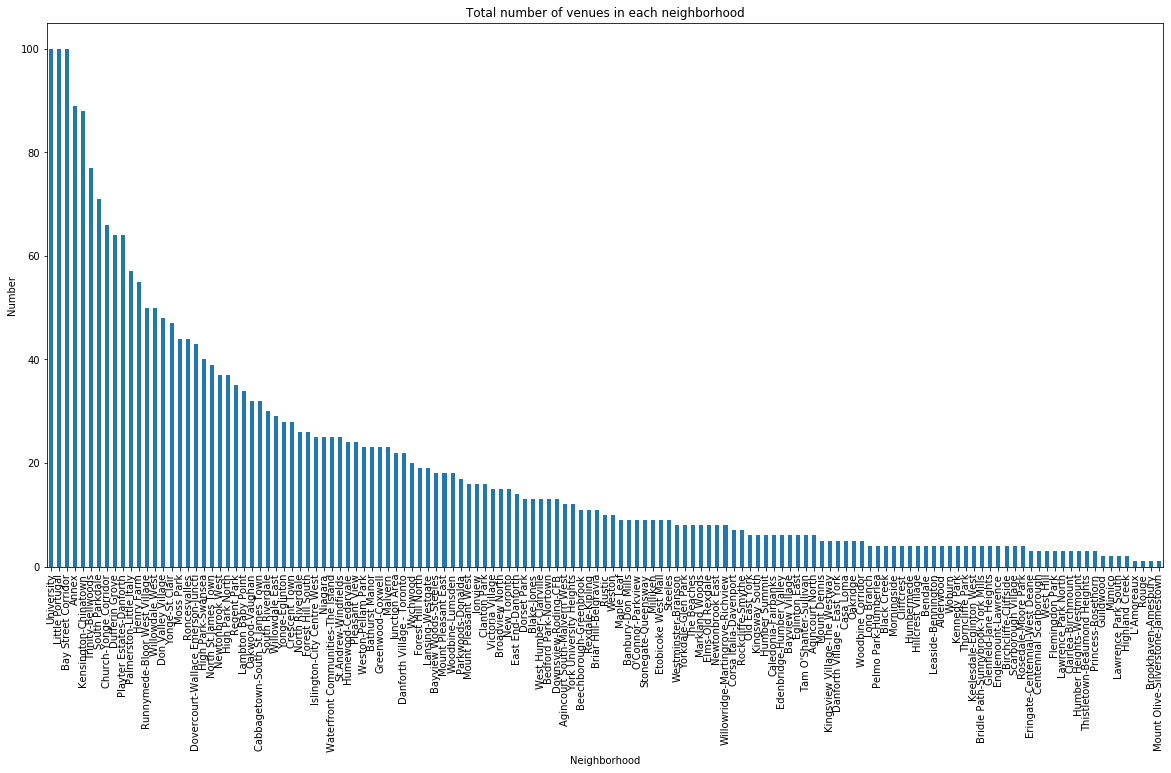

In [140]:
# graph visualization (the limit is reached for top 3 neighborhoods)

import matplotlib.pyplot as plt
number_venues.plot(kind='bar', figsize=(20, 10), legend=None)
plt.title('Total number of venues in each neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number')
plt.show()

In [141]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 298 uniques categories.


In [142]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Animal Shelter,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt North,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
1,Agincourt South-Malvern West,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
2,Alderwood,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
3,Annex,0.022472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022472,...,0.011236,0.0,0.011236,0.000000,0.0,0.0,0.000000,0.0,0.0,0.011236
4,Banbury-Don Mills,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,Wychwood,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.050000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
135,Yonge-Eglinton,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
136,Yonge-St.Clair,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021277,...,0.021277,0.0,0.021277,0.000000,0.0,0.0,0.021277,0.0,0.0,0.000000
137,York University Heights,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.083333,0.0,0.0,0.000000,0.0,0.0,0.000000


In [144]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [145]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt North,Business Service,Beer Store,Salon / Barbershop,Coffee Shop,Indian Restaurant,Furniture / Home Store,Women's Store,Event Space,Eastern European Restaurant,Egyptian Restaurant
1,Agincourt South-Malvern West,Chinese Restaurant,Sandwich Place,Pharmacy,Gas Station,Coffee Shop,Park,American Restaurant,Gym,Diner,Sushi Restaurant
2,Alderwood,Breakfast Spot,Coffee Shop,Baseball Field,Park,Women's Store,Farm,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant
3,Annex,Italian Restaurant,Café,Japanese Restaurant,Hotel,Sushi Restaurant,Coffee Shop,Spa,Smoke Shop,Boutique,Restaurant
4,Banbury-Don Mills,Coffee Shop,Middle Eastern Restaurant,History Museum,Hotel,Golf Course,Café,Gym,Trail,Ethiopian Restaurant,Doner Restaurant


In [146]:
# Just interesting are there any venues with 'Russian' in its name? Only found Eastern European Restaurant, close but not we looked for

russian_venues = [col for col in toronto_grouped.columns if 'russian' in col]
print(list(toronto_grouped.columns))
print(russian_venues)

['Neighborhood', 'Yoga Studio', 'Accessories Store', 'African Restaurant', 'Airport', 'Airport Food Court', 'Airport Lounge', 'Airport Service', 'Airport Terminal', 'American Restaurant', 'Animal Shelter', 'Antique Shop', 'Arcade', 'Arepa Restaurant', 'Argentinian Restaurant', 'Art Gallery', 'Art Museum', 'Arts & Crafts Store', 'Arts & Entertainment', 'Asian Restaurant', 'Athletics & Sports', 'Auto Dealership', 'Auto Garage', 'Auto Workshop', 'Automotive Shop', 'BBQ Joint', 'Baby Store', 'Bagel Shop', 'Bakery', 'Bank', 'Bar', 'Baseball Field', 'Basketball Court', 'Beach', 'Beach Bar', 'Beer Bar', 'Beer Store', 'Big Box Store', 'Bistro', 'Bookstore', 'Boutique', 'Brazilian Restaurant', 'Breakfast Spot', 'Brewery', 'Bridal Shop', 'Bridge', 'Bubble Tea Shop', 'Buffet', 'Building', 'Burger Joint', 'Burrito Place', 'Bus Line', 'Bus Station', 'Bus Stop', 'Business Service', 'Butcher', 'Cafeteria', 'Café', 'Cajun / Creole Restaurant', 'Camera Store', 'Candy Store', 'Caribbean Restaurant', 'Ce

## Clustering

In [147]:
# first is to find optimal K
k_df=df_sorted.copy()
print(k_df.head())

                        Neighborhood  Number   Latitude  Longitude
0                Westminster-Branson  5755.0  43.770392 -79.442111
1                   Newtonbrook West  2645.0  43.781663 -79.415981
2                     Bathurst Manor  1545.0  43.755480 -79.438390
3                    Willowdale East  1220.0  43.766694 -79.388044
4  Waterfront Communities-The Island  1150.0  43.635298 -79.394945


In [148]:
from sklearn.cluster import KMeans
k_df.drop(['Neighborhood'], axis=1, inplace=True)
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(k_df)
    distortions.append(kmeanModel.inertia_)

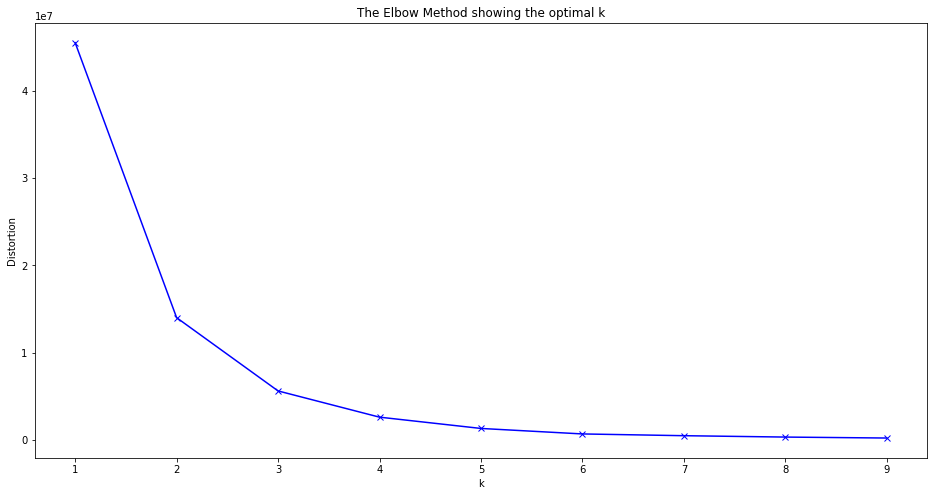

In [149]:
# To find optimal K I used the elbow method
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [150]:
# set number of clusters
kclusters = 3

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [151]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_sorted

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Neighborhood,Number,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Westminster-Branson,5755.0,43.770392,-79.442111,0.0,Pizza Place,Coffee Shop,Bakery,Bus Line,Grocery Store,Sandwich Place,Gym,Juice Bar,Farm,Falafel Restaurant
1,Newtonbrook West,2645.0,43.781663,-79.415981,0.0,Korean Restaurant,Coffee Shop,Bubble Tea Shop,Dessert Shop,Playground,Burrito Place,Bank,Food Stand,Smoothie Shop,Salad Place
2,Bathurst Manor,1545.0,43.755480,-79.438390,0.0,Bank,Coffee Shop,Pharmacy,Chinese Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Shopping Mall,Supermarket,Sushi Restaurant,Sandwich Place
3,Willowdale East,1220.0,43.766694,-79.388044,0.0,Coffee Shop,Café,Spa,Clothing Store,Italian Restaurant,Chinese Restaurant,Shopping Mall,Burger Joint,Liquor Store,Supermarket
4,Waterfront Communities-The Island,1150.0,43.635298,-79.394945,0.0,Coffee Shop,Café,Park,Gym,Tunnel,Japanese Restaurant,Scenic Lookout,Sculpture Garden,Pharmacy,Dance Studio


In [152]:
# in case if there are na values
print(toronto_merged.shape)
toronto_merged.dropna(axis=0, inplace=True)
print(toronto_merged.shape)

(140, 15)
(139, 15)


In [153]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


In [154]:
# generate choropleth map 
threshold_scale = np.linspace(df_sorted['Number'].min(),
                              df_sorted['Number'].max(),
                              10, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

folium.Choropleth(
    geo_data=toronto_data,
    name = 'choropleth',
    data=df_sorted,
    columns=['Neighborhood', 'Number'],
    key_on='feature.properties.HOOD',
    threshold_scale = threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Russian speaking number of people'
).add_to(map_clusters)
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters



In [155]:
cluster0=toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster0.head()

,Number,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,5755.0,Pizza Place,Coffee Shop,Bakery,Bus Line,Grocery Store,Sandwich Place,Gym,Juice Bar,Farm,Falafel Restaurant
1,2645.0,Korean Restaurant,Coffee Shop,Bubble Tea Shop,Dessert Shop,Playground,Burrito Place,Bank,Food Stand,Smoothie Shop,Salad Place
2,1545.0,Bank,Coffee Shop,Pharmacy,Chinese Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Shopping Mall,Supermarket,Sushi Restaurant,Sandwich Place
3,1220.0,Coffee Shop,Café,Spa,Clothing Store,Italian Restaurant,Chinese Restaurant,Shopping Mall,Burger Joint,Liquor Store,Supermarket
4,1150.0,Coffee Shop,Café,Park,Gym,Tunnel,Japanese Restaurant,Scenic Lookout,Sculpture Garden,Pharmacy,Dance Studio


In [156]:
cluster1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster1.head()

,Number,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,375.0,Jewelry Store,Hotel,Park,Event Space,Doner Restaurant,Donut Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant
27,320.0,Park,Hockey Arena,Massage Studio,Coffee Shop,Restaurant,Donut Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant
34,255.0,Plaza,Home Service,Park,Event Space,Doner Restaurant,Donut Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant
51,155.0,Electronics Store,Dim Sum Restaurant,Park,Women's Store,Falafel Restaurant,Eastern European Restaurant,Egyptian Restaurant,Ethiopian Restaurant,Event Space,Farm
56,140.0,Stables,Park,Concert Hall,Dog Run,Donut Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space


In [157]:
cluster2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
cluster2.head()

,Number,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,110.0,Convenience Store,Women's Store,Farm,Donut Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant
96,60.0,Convenience Store,Women's Store,Farm,Donut Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant


In [158]:
top_venues0=cluster0.iloc[:, 1:4]

In [159]:
top_venues0.head()

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Pizza Place,Coffee Shop,Bakery
1,Korean Restaurant,Coffee Shop,Bubble Tea Shop
2,Bank,Coffee Shop,Pharmacy
3,Coffee Shop,Café,Spa
4,Coffee Shop,Café,Park


In [160]:
top_venues0=top_venues0.apply(pd.value_counts)
top_venues0.sort_values(['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue'], ascending=[False, False, False])

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
Coffee Shop,23.0,17.0,13.0
Pizza Place,10.0,9.0,6.0
Café,8.0,8.0,4.0
Italian Restaurant,5.0,2.0,2.0
Bar,5.0,1.0,2.0
...,...,...,...
Taco Place,NaN,NaN,1.0
Tennis Court,NaN,NaN,1.0
Theater,NaN,NaN,1.0
Train Station,NaN,NaN,1.0


In [161]:
top_venues1=cluster1.iloc[:, 1:4]

In [162]:
top_venues1.head()

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
22,Jewelry Store,Hotel,Park
27,Park,Hockey Arena,Massage Studio
34,Plaza,Home Service,Park
51,Electronics Store,Dim Sum Restaurant,Park
56,Stables,Park,Concert Hall


In [163]:
top_venues1=top_venues1.apply(pd.value_counts)
top_venues1.sort_values(['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue'], ascending=[False, False, False])

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
Park,12.0,1.0,4.0
Electronics Store,1.0,NaN,NaN
Jewelry Store,1.0,NaN,NaN
Plaza,1.0,NaN,NaN
Stables,1.0,NaN,NaN
Theater,1.0,NaN,NaN
Women's Store,NaN,2.0,2.0
Home Service,NaN,2.0,NaN
Business Service,NaN,1.0,NaN
Convenience Store,NaN,1.0,NaN


In [164]:
top_venues2=cluster2.iloc[:, 1:4]
top_venues2.head()

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
68,Convenience Store,Women's Store,Farm
96,Convenience Store,Women's Store,Farm


In [165]:
top_venues2=top_venues2.apply(pd.value_counts)
top_venues2.sort_values(['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue'], ascending=[False, False, False])

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
Convenience Store,2.0,NaN,NaN
Women's Store,NaN,2.0,NaN
Farm,NaN,NaN,2.0
